<h5>First import the required packages and load the trajectory</h5>

In [19]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import squareform
import os
import MDAnalysis as mda

traj = md.load('kras_prod.dcd', top='ionized.psf')

<h5>Calculate RMSD as we did on class</h5>

In [8]:
protein_sel = traj.topology.select('protein and backbone')
protein_traj = traj.atom_slice(protein_sel)
print(protein_traj)

distances = np.empty((protein_traj.n_frames, protein_traj.n_frames))
for i in range(protein_traj.n_frames):
    distances[i] = md.rmsd(protein_traj, protein_traj, i)
    #print(distances[i])
print('Max pairwise rmsd: %f nm' % np.max(distances))

<mdtraj.Trajectory with 2000 frames, 680 atoms, 170 residues, and unitcells>
Max pairwise rmsd: 0.162733 nm


<h5>Using the average linkage function for clustering and make the plot</h5>

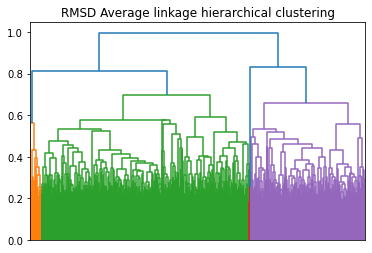

In [7]:
linkage = scipy.cluster.hierarchy.linkage(distances, method='average')
plt.title('RMSD Average linkage hierarchical clustering')
_ = scipy.cluster.hierarchy.dendrogram(linkage, no_labels=True, count_sort='descendent')

<h5>To calculate the 4 clusters of the plot, we should flatten the dentogram and use as maxdistance 0.7 A. The most populated cluster is the second one</h5>

In [13]:
clusters = fcluster(linkage, 0.7, criterion='distance')

cluster2=np.where(clusters==2)
print(len(cluster2[0]))
print(cluster2[0])
traj_cluster2=traj[cluster2]

1239
[ 691  692  693 ... 1997 1998 1999]


<h5>Find the centroid (most representative structure of the cluster). See: https://www.mdtraj.org/1.9.5/examples/centroids.html </h5>

In [17]:
atom_indices = [a.index for a in traj_cluster2.topology.atoms if a.element.symbol != 'H']
distances = np.empty((traj_cluster2.n_frames, traj_cluster2.n_frames))
for i in range(traj_cluster2.n_frames):
    distances[i] = md.rmsd(traj_cluster2, traj_cluster2, i, atom_indices=atom_indices)
beta = 1
index = np.exp(-beta*distances / distances.std()).sum(axis=1).argmax()
print(index)
centroid = traj[index]
print(centroid)

729
<mdtraj.Trajectory with 1 frames, 23296 atoms, 7055 residues, and unitcells>
